In [ ]:
import numpy as np
from os import listdir
from os.path import isfile, join
from scipy import signal
import soundfile as sf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

NameError: name 'ax2' is not defined

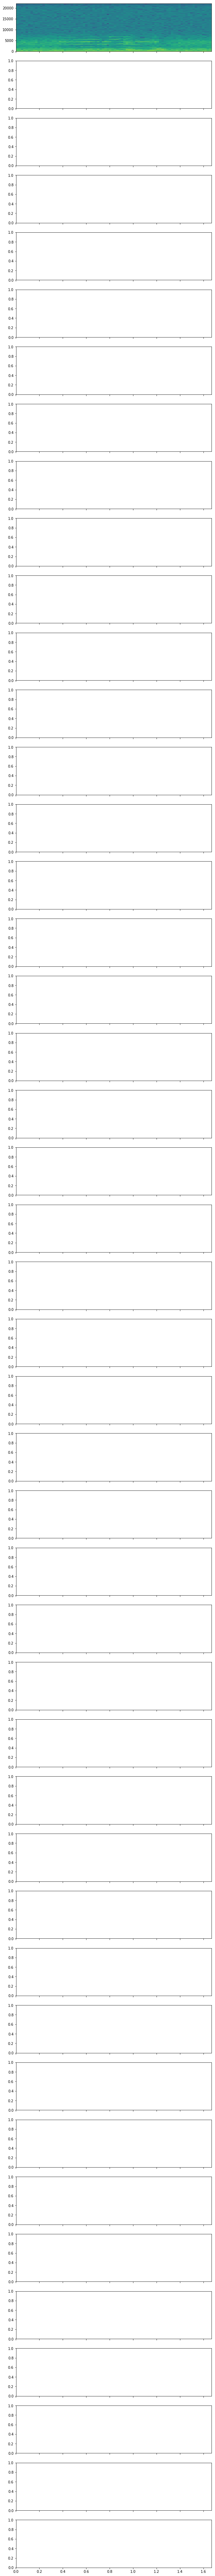

In [26]:
folderpath = r"C:\Users\Jennifer Rogers\Downloads\FlacFiles"
onlyfiles = [f for f in listdir(folderpath) if isfile(join(join(folderpath, f)))]
numFiles = len(onlyfiles)
f, axarr = plt.subplots(numFiles, sharex=True, figsize=(10, numFiles*3))
for idx, file in enumerate(onlyfiles):
    data, samplerate = sf.read(join(folderpath, file))
    f, t, spec = signal.spectrogram(data, samplerate)
    axarr[idx].specgram(data, Fs=samplerate, NFFT=1024)
    
    scale_y = 1000
    ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
    axarr[idx].yaxis.set_major_formatter(ticks_y)

    axarr[idx].set_title(file)
plt.show()